In [430]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [431]:
df = pd.read_csv("laptop_data.csv")

In [432]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [433]:
df.shape

(1303, 12)

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [435]:
df.duplicated().sum()

np.int64(0)

so no duplicate values...

In [436]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

so no missing value, no pre- processing needed

preprocessing start

unnamed clumn removed, ram --> int , weight --> float..

In [437]:
df.drop(columns= ['Unnamed: 0'], inplace =True)

In [438]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')


In [439]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


ram and weight still object 


In [440]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight']= df['Weight'].astype('float32')

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


// data cleaning done..

data analysis start performing...(EDA starts)...
price pe karenege(will do on price first)
univariate analysis..

In [442]:
import seaborn as sns

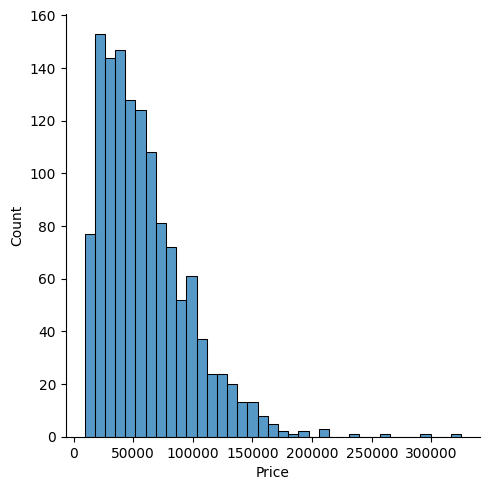

In [443]:
sns.displot(df['Price'])

distrbution of data.. laptop less price more and laptop price more less.. skewed data..
data skewed algo convering problem lets see...


<Axes: xlabel='Company'>

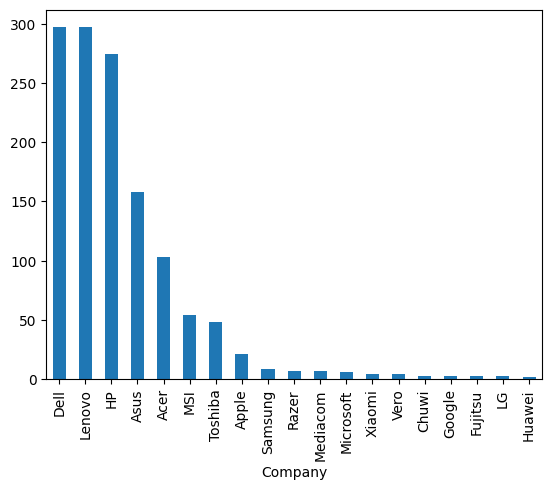

In [444]:
df['Company'].value_counts().plot(kind ='bar')

bar plots makes a bar of campony of taking the avrage of all the prices of that company came

In [445]:
# proving mathematically..

from scipy.stats import f_oneway

company_groups = [df['Price'][df['Company'] == comp] for comp in df['Company'].unique()]

# Perform the ANOVA test
f_statistic, p_value = f_oneway(*company_groups)

print(f"\nF-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value}")



F-statistic: 13.9425
P-value: 6.900836785322048e-39


some categories laptops are more....
// lets see if company name effects price..

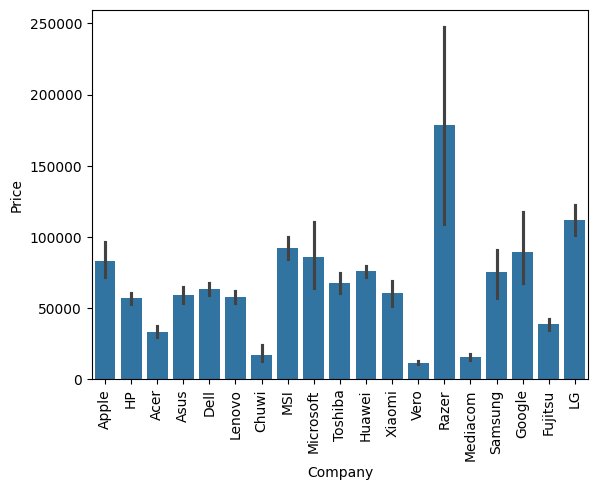

In [446]:
sns.barplot(x = df['Company'], y= df['Price']) # would not be able to see
# mathplot lib needed to come 
plt.xticks(rotation = 'vertical')
plt.show()

most costly razer karke haa...
lg laptops very expensive...
budget brands hp etc 
claealry we can see comapnies kee sath prices vary 
// depends on the comapny also... we can see fromt he graph..

// lets move on to next column 
// lets see how many types of laptps are there..

// black bar showing the confidence interval...( 95 percent by default)

// razer kee laptops prices vary significnatly... but other comapnies prices dont vary much..

// although we are seeing price is changing with company but lets prove it mathematically by mathematical tests


<Axes: xlabel='TypeName'>

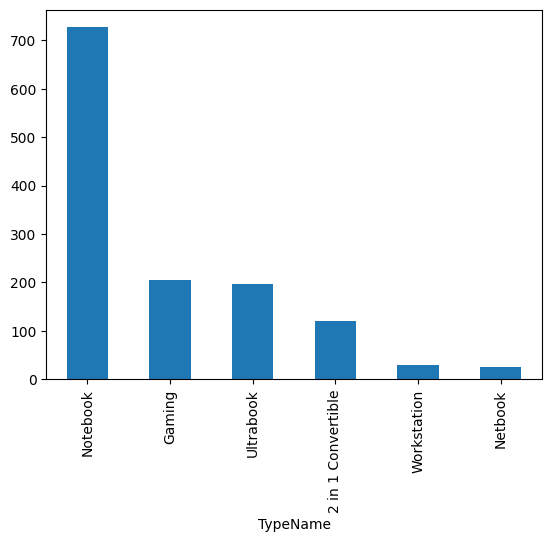

In [447]:
df['TypeName'].value_counts().plot(kind = 'bar')

6 type ke laptop haan... notebook he sabse jyada bikte haan kyuke yeeh budget range haa...
// but hume price or type ka nahi pata chala 
// we just got how many of eahc type...
// we will now check // averga evalue of each type...


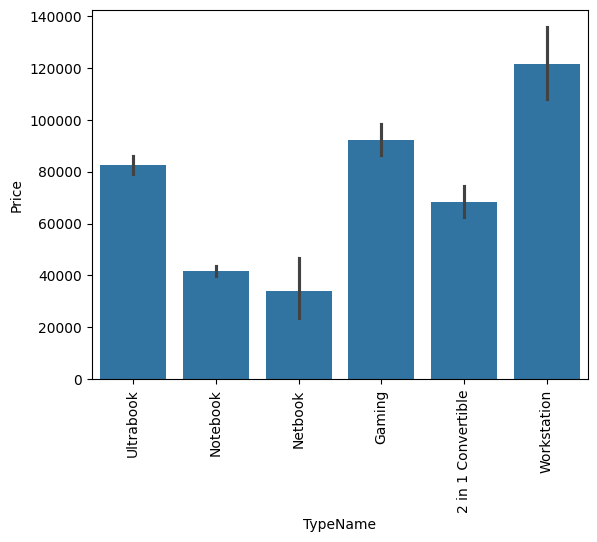

In [448]:
sns.barplot(x = df['TypeName'], y= df['Price']) # would not be able to see
# mathplot lib needed to come 
plt.xticks(rotation = 'vertical')
plt.show()

In [449]:
# proving mathemically 
from scipy.stats import f_oneway
type_groups = [df['Price'][df['TypeName'] == t] for t in df['TypeName'].unique()]

# Perform the ANOVA test
f_statistic, p_value = f_oneway(*type_groups)

print(f"\nF-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value}")


F-statistic: 161.0231
P-value: 2.955981663893258e-133


// tuu isse mujhe pata chala jiss type ka laptop lee raha usse price pe difference aayage...

// next_col is size col..(inches it called here... )

// pehla dekhta haan yeh kiss tarah se vary kar raha ha puraa..

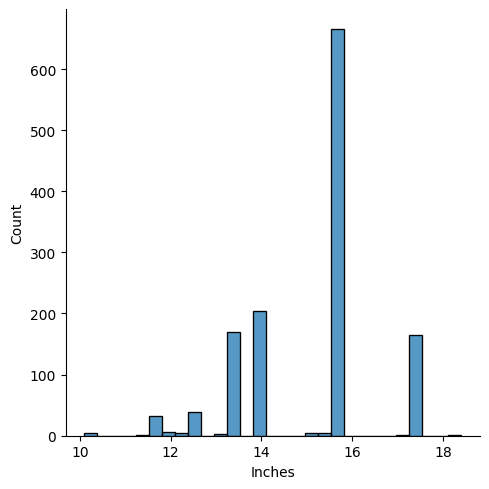

In [450]:
sns.displot(df['Inches'])

// sabse jyada juu latop haan 15.6 something maa he lie kar rahe haan 

// 2 - 3 spikes 15.6 13 -14 ke pass and 17 ke pass...

// but yaar kuch juu kam kitne sikes kaha pe haa pata nahi lag raha 
// lets plot scatter plot...

// these values are properly discete values... (more like categorical not continous..)




<Axes: xlabel='Inches', ylabel='Price'>

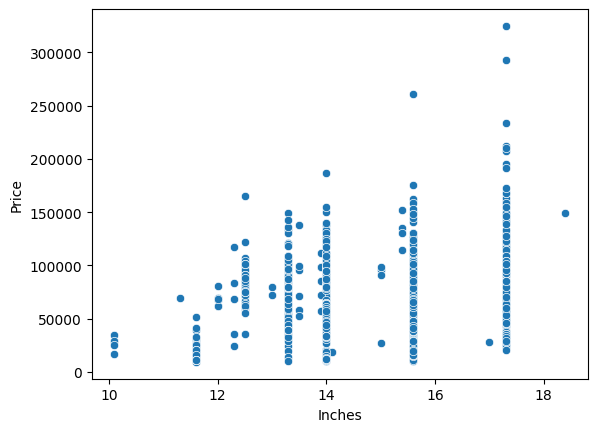

In [451]:
sns.scatterplot(x = df['Inches'], y = df['Price'])

// suu size it is ambigous means like we can sya it is varying but not much...
// so we have to justify is there a relationship between price and inches...
// there is a relationship but is not a very strong relationship...
// most of the laptop juu 13 - 15 inch me gir raha haan unka price similar...
// when laptop is very big... so some latops have huge price...
// strong correlation not there but there is a correlation...



// lets move on to next column because here the in formation is not in some standarised way...
// screen resolution...
// different laptops given in different way...
// value_counts laga kark dekhte haan how many types..

In [452]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

// common cheez yeh haa ke har type me resolution kaa value mil raha haa..
// words are inconsitent...
// one more piece of information hideen there laptop is touchscrren or not...
// ips panel there or not we would also get to know that...
// lets approach it one by one..


// lets do some feature engineerting and see if every latop is touchscrren or not 
// extra column add.. for it...

In [453]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [454]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [455]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
318,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,52214.4000,0
1223,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,91288.3536,1
150,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56,66560.5728,0
345,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.40,60153.1200,0
340,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics,Linux,2.20,14646.6720,0


// 5 pe bhi naahi aaya ... 10 pe aayayga ... random sample uthayaga..

In [456]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
604,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M420,Linux,2.18,24775.2000,0
536,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,42486.0048,0
739,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.40,21887.4240,0
1126,Lenovo,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4,64GB Flash Storage,Intel HD Graphics 400,Windows 10,0.69,25521.1200,1
691,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.70,37242.7200,0
845,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,256GB SSD,AMD Radeon R5 M420,Windows 10,2.18,39373.9200,0
247,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16,256GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.60,159786.7200,0
1258,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,1.0TB Hybrid,AMD Radeon R5 M330,Windows 7,2.32,47685.6000,0
54,Acer,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.40,20459.5200,0
297,Dell,Workstation,17.3,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,16,256GB SSD,Nvidia Quadro M1200,Windows 10,3.42,153705.3408,0


<Axes: xlabel='Touchscreen'>

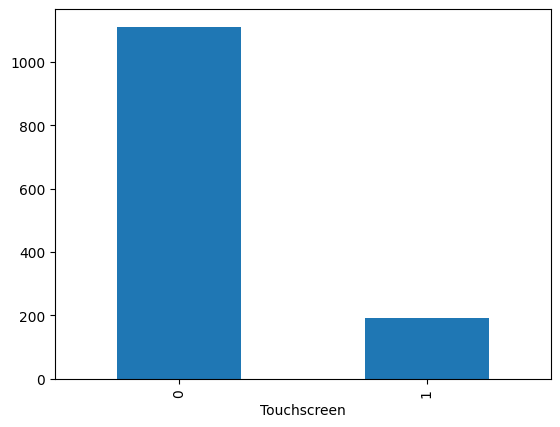

In [457]:
df['Touchscreen'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

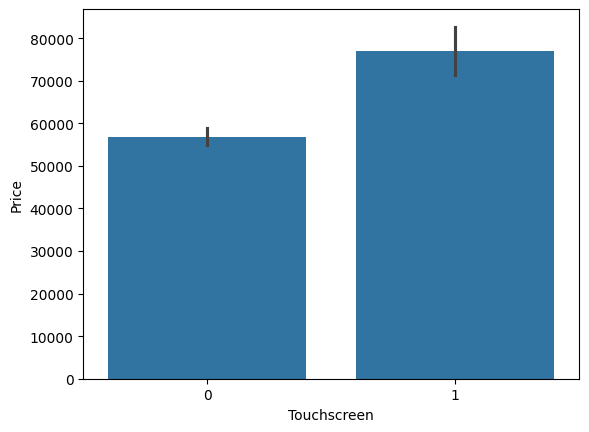

In [458]:
sns.barplot( x = df['Touchscreen'] , y = df['Price'])

// now lets make a column for ips panel...

In [459]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [460]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


// jaldi see iske upar bhi same anlysis karte haan 
// what is distribution...
// how many laptops are IPS 
// ans how many not..


<Axes: xlabel='Ips'>

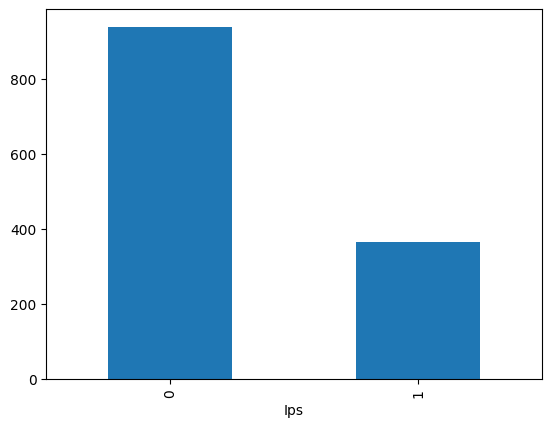

In [461]:
df['Ips'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Ips', ylabel='Price'>

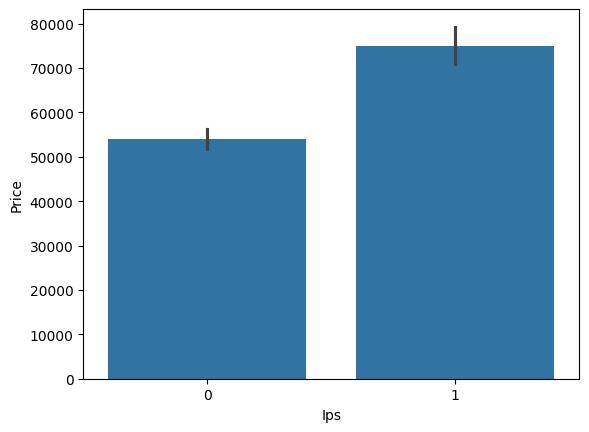

In [462]:
sns.barplot( x = df['Ips'] , y = df['Price'])

// looking like benefical as price varies so lets remain it 
// expand = true ... instead of giving me a new list it should create a data_frame... 
// splitting at x and how many times... 

In [463]:
new = df['ScreenResolution'].str.split('x',n =1,expand = True)

In [464]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [465]:
new.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


// temporary data frame me store kar leta haan let say new 

In [466]:
df['X_res'] = new[0]
df['Y_res'] = new[1]


In [467]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


// y resolution tuu sahi dikh raha ha.. it is in place..

In [468]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
1165,Dell,Gaming,15.6,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,79813.44,0,0,4K Ultra HD 3840,2160
817,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.23,20512.80,0,0,1366,768
826,Asus,2 in 1 Convertible,13.3,Touchscreen / Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.10,72354.24,1,0,Touchscreen / Full HD 1920,1080
773,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.62,58554.72,0,0,Full HD 1920,1080
776,Lenovo,Notebook,15.6,4K Ultra HD 3840x2160,Intel Core i7 6820HQ 2.7GHz,16,512GB SSD,Nvidia Quadro M2000M,Windows 7,2.50,126273.60,0,0,4K Ultra HD 3840,2160


// regular expressions... little bit study X_res see actual value extract karne ke liya... // pandas string methods 
// Regex = a Swiss Army knife → "look for anything that matches this rule."
// all these values would be inside list thats why used apply function...
// i dont want to create extra function thats why i created lambda...
// remove commas inside numbers if any 
// Uses regex to extract all numbers from the string
// x[0] takes the first number from that list.

In [469]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0] )

// regular expression kaa code jaha pee 3 yaa char digits huu sakte haan... 
// spaces ka dhayan rakh lee be..
// these all values are in a list , list see bahar nikalana haa.. 

In [470]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


// still there data type is object integer karna padega... X_res and y_res 
// kyuki wuh... 
// 15 columns now...

In [472]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


//  both integers now..

why x_resolution different and why y_resolution different kiya ?

// correlation nikal ke juu numeric column haa unka saath price kaa correlation samajh mee aajayaga...

In [474]:
df.corr(numeric_only=True) #only numeric kuu karta ha..

,Inches,Ram,Weight,Price,Touchscreen,Ips,X_res,Y_res
Inches,1.000000,0.237993,0.827631,0.068197,-0.361735,-0.114804,-0.071245,-0.095404
Ram,0.237993,1.000000,0.383874,0.743007,0.116984,0.206623,0.433121,0.424437
Weight,0.827631,0.383874,1.000000,0.210370,-0.294620,0.016967,-0.032880,-0.053846
Price,0.068197,0.743007,0.210370,1.000000,0.191226,0.252208,0.556529,0.552809
Touchscreen,-0.361735,0.116984,-0.294620,0.191226,1.000000,0.150512,0.351066,0.357930
Ips,-0.114804,0.206623,0.016967,0.252208,0.150512,1.000000,0.281457,0.289030
X_res,-0.071245,0.433121,-0.032880,0.556529,0.351066,0.281457,1.000000,0.994219
Y_res,-0.095404,0.424437,-0.053846,0.552809,0.357930,0.289030,0.994219,1.000000


In [475]:
corr_matrix = df.corr(numeric_only=True)

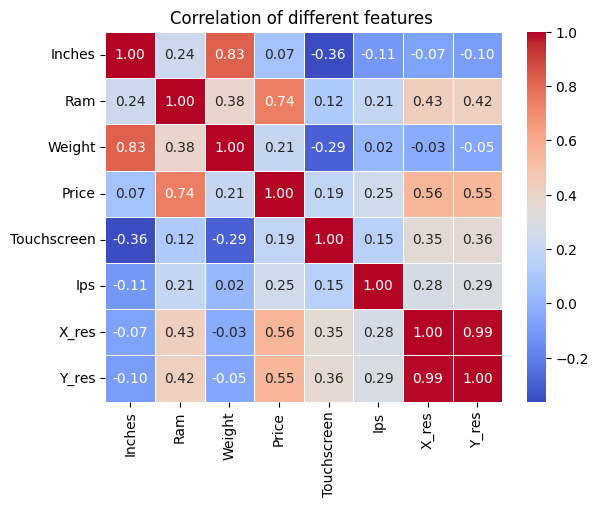

In [476]:
sns.heatmap(
    corr_matrix,      # The data to plot
    annot=True,       # Write the data values in the squares
    cmap='coolwarm',  # Use a color map that shows positive/negative well
    fmt='.2f',        # Format the annotations to two decimal places
    linewidths=.5     # Add lines between squares
)

plt.title('Correlation of different features ') # Add a title
plt.show()

only 8 numeric columns..
// i dont want corr with respect to everybody only wrt price... thats what matters to me...


In [477]:
df.corr(numeric_only=True)['Price'] 

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

// saw in diagram also ... inches ke saath not strong correaltion...
// ram , weight strong correaltion(interesting) lets see...
// x_res 
// y_res 
// sres and yres has huge strong correlation with the data..
// sres or yes increases price also increase as positive correaltion ...
// this is corrwlarion coeefficient...


// most computer nowdays have standard aspect ratio 16:9 something like that for most so it was expected...

// i am making a completely new column ppi more the ppi more expensive the laptop is generally
// as we can see from above i am not going to use x_res and y_res as there is multi-collinearity...
// inches kam nahi aa paa raha..
// thinking of commbing all these 3 into making one new column called ppi..
// screen pixel density (sharpness/clarity).(how many pixels are packed into each inch of the screen.)

In [478]:
df['ppi'] = ((df['X_res'])**2 + (df['Y_res'])**2 )**0.5/df['Inches'].astype('float')

In [479]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
 15  ppi               1303 non-null   float64
dtypes: float32(1), float64(3), int32(1), int64

In [481]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

// ppi ke sath bahut string correaltion...
// taking hints from other data sets how they clean it...
// what matters and how to check relationships...

// taken data from screen_resolution column so no need of screen_resolution column
// so i am dropping it...



In [482]:
df.drop(columns= ['ScreenResolution'],inplace = True)

In [483]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Cpu          1303 non-null   object 
 4   Ram          1303 non-null   int32  
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   float32
 9   Price        1303 non-null   float64
 10  Touchscreen  1303 non-null   int64  
 11  Ips          1303 non-null   int64  
 12  X_res        1303 non-null   int64  
 13  Y_res        1303 non-null   int64  
 14  ppi          1303 non-null   float64
dtypes: float32(1), float64(3), int32(1), int64(4), object(6)
memory usage: 142.6+ KB


// 15 columns still... 
// lets drop the three throiugh which we made one new column..

In [485]:
df.drop(columns= ['X_res'],inplace = True)
df.drop(columns= ['Y_res'],inplace = True)
df.drop(columns= ['Inches'],inplace = True)

In [486]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int32  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float32
 8   Price        1303 non-null   float64
 9   Touchscreen  1303 non-null   int64  
 10  Ips          1303 non-null   int64  
 11  ppi          1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(2), object(6)
memory usage: 112.1+ KB


// now 13 columns...
// till screen-resultion eda done...
// cpu

// cpu column too many categories...


In [488]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

// 118 different categories.... most
common i5 ,i7 etc but still others are also there..
// thinking of making 5 differnt catgeroes from this 
// 3 --> intel i3,i5,i7
// 1 -> intel core celeron etc..
// 1 --> amd etc..

// my thoght process to get that 
// --> get first 3 words

// because pehla 3 words he basically decide kar raha haan ... what kind of cpu it is...



// slist na banar i want string..

In [489]:
df['Cpu Name'] = df['Cpu'].apply(lambda x :" ".join(x.split()[0:3] ))

In [490]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int32  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float32
 8   Price        1303 non-null   float64
 9   Touchscreen  1303 non-null   int64  
 10  Ips          1303 non-null   int64  
 11  ppi          1303 non-null   float64
 12  Cpu Name     1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(7)
memory usage: 122.3+ KB


// aab mujhe iss string pee kam karna haa..
// basically 3 different groups ... 
// mujhe string mila and on the basis of first three words 
// i group them into one of the three groups...

// lets make a function for that..

In [492]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    
    else :
        if text.split()[0] == 'Intel':
            return 'other Intel processor'
        
        else:
            return 'Amd processor'

In [493]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [494]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

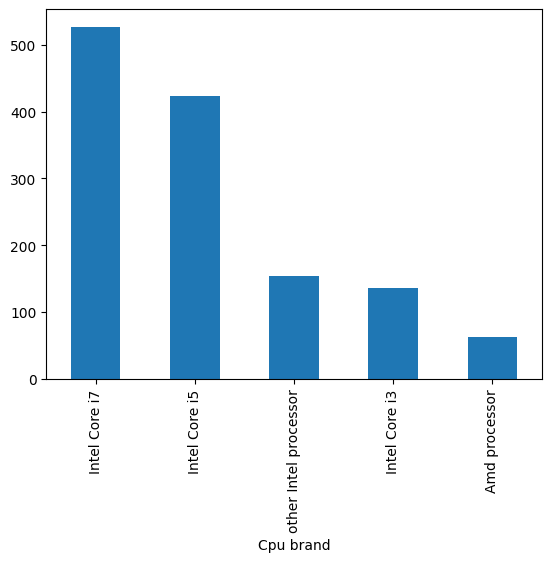

In [495]:
df['Cpu brand'].value_counts().plot(kind = 'bar')

// on thing to notice here is i7 is more than ip but when we earlier did that i7 came to be 146 and i5 190 
// but when different generation of i7 are added they surpass the count of i5...

In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int32  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float32
 8   Price        1303 non-null   float64
 9   Touchscreen  1303 non-null   int64  
 10  Ips          1303 non-null   int64  
 11  ppi          1303 non-null   float64
 12  Cpu Name     1303 non-null   object 
 13  Cpu brand    1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(8)
memory usage: 132.5+ KB


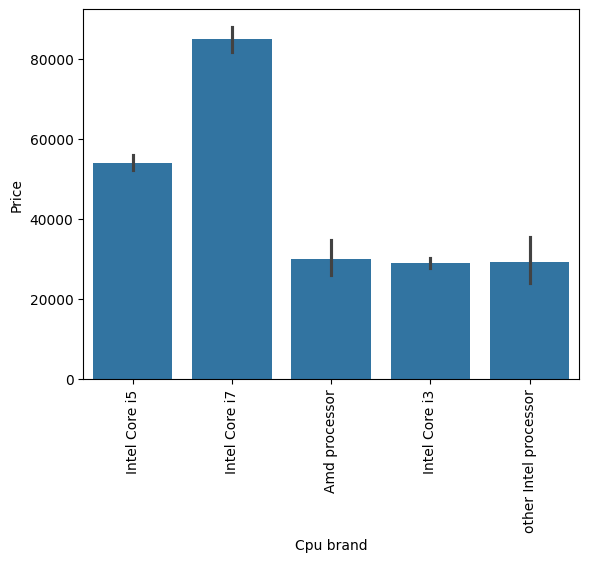

In [497]:
sns.barplot( x = df['Cpu brand'] , y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int32  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float32
 8   Price        1303 non-null   float64
 9   Touchscreen  1303 non-null   int64  
 10  Ips          1303 non-null   int64  
 11  ppi          1303 non-null   float64
 12  Cpu Name     1303 non-null   object 
 13  Cpu brand    1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(8)
memory usage: 132.5+ KB


by looking at the grpah above i can observe that i7 ka price on an averga 80k starting... 
i5 around 50k
/// other processor like amd i3 and other intel processors their price almost similar...
// i7 and i5 see kaafi farak pad raha ha...
// so iss column ku upoar bhi price depend karega...

// by intution also porecssor wuld decide price of laptop...


// lets drop 2 columns through which we created our cpu brand column...
// because now we dont need it...


In [499]:
df.drop(columns = ['Cpu','Cpu Name'],inplace= True)

In [500]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float32
 7   Price        1303 non-null   float64
 8   Touchscreen  1303 non-null   int64  
 9   Ips          1303 non-null   int64  
 10  ppi          1303 non-null   float64
 11  Cpu brand    1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(6)
memory usage: 112.1+ KB


// lets now focus on Ram...


<Axes: xlabel='Ram'>

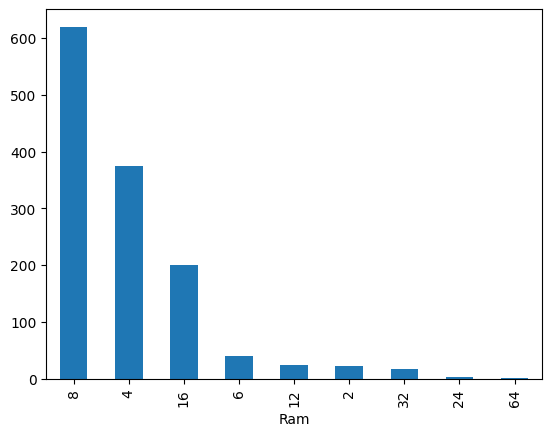

In [502]:
df["Ram"].value_counts().plot(kind = 'bar')

// okk  the ram distrbution is skewed...
// the 8 gb ram sells the most  in market...
// okk this was frequency anlayis of that product in our data...


// lets do now do price annalysis of this column with price..

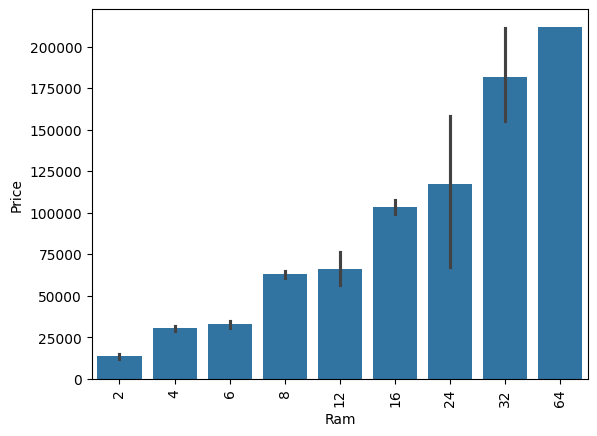

In [503]:
sns.barplot( x = df['Ram'] , y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

// as expected.. 
// very linear is liya correlation was very high of it with price...

// it is clearly linearship..
// means like the 6 and 4 and 12 and 8 it is same maybe companies are dling some ghapla
// for seling their product instead ogf 8 gb ram they mark it as 12 gb ram..

// so its important stay in our dATA..


In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float32
 7   Price        1303 non-null   float64
 8   Touchscreen  1303 non-null   int64  
 9   Ips          1303 non-null   int64  
 10  ppi          1303 non-null   float64
 11  Cpu brand    1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(6)
memory usage: 112.1+ KB


// lets go next column memory column...

// lets see how many catgeories are there in memory...




In [505]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [506]:
df['Memory'].value_counts().size
# 39 different types of meories possible...


39

// how to handle so many differencatgeories lets think..
// what to aplly 
// so that otu analysis goes good 
// model works good



// as i look closely towards my data in memory column the one thing is common amgon  all them 
// that is either they are ssd, hdd , flash or hybrid ..
// i mean they can be comnbination of ssd +hdd but still...

// lets make 4 new columsn for this...



Part 1: Cleaning and Standardizing
This step cleans up the text in the Memory column to make it uniform.



In [507]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/var/folders/vp/mhbkf2gs397d1pq5hhxflp6h0000gn/T/ipykernel_22963/3733626481.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)


before 
256GB SSD
1.0TB HDD
512GB SSD + 1TB HDD
128GB Flash Storage


after
256 SSD
1000 HDD
512 SSD + 1000 HDD
128 Flash Storage



removed
gb 
converted tb to gb
and remove decimals if any...





Part 2: Splitting Dual Storage
This part looks for a + sign and splits the Memory column into two new columns: first and second.



In [508]:
new = df["Memory"].str.split("+", n = 1, expand = True)
df["first"] = new[0]
df["second"] = new[1]

In [509]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,first,second
501,HP,Notebook,8,256 SSD,AMD Radeon 520,Windows 10,1.91,32979.7872,0,0,100.454670,Intel Core i5,256 SSD,None
348,Asus,2 in 1 Convertible,4,32 Flash Storage,Intel HD Graphics 500,Windows 10,1.50,19980.0000,1,0,135.094211,other Intel processor,32 Flash Storage,None
139,HP,Notebook,4,256 SSD,Intel HD Graphics 620,Windows 10,1.32,37242.7200,0,1,165.632118,Intel Core i5,256 SSD,None
1092,Asus,Gaming,8,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.70,85194.7200,0,1,127.335675,Intel Core i7,256 SSD,1000 HDD
1089,Acer,Notebook,4,500 HDD,AMD Radeon R5,Windows 10,2.40,20619.3600,0,0,100.454670,Amd processor,500 HDD,None


Before:

Memory
256 SSD
1000 HDD
512 SSD + 1000 HDD
128 Flash Storage



After:

Memory	               first	                       second
256 SSD	               256 SSD	                        None
1000 HDD	           1000 HDD	                        None
512 SSD + 1000 HDD	   512 SSD	                        1000 HDD
128 Flash Storage	   128 Flash Storage	            None


None appears where there was no + to split on.



Part 3: Processing the First Component
Here, we create "indicator" columns (Layer1...) based on the first column 
and then strip all text from first to leave only the numbers.

In [510]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)



In [511]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
619,Acer,2 in 1 Convertible,4,32 Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,20193.12,1,1,135.094211,other Intel processor,32 Flash Storage,None,0,0,0,1
63,Asus,Notebook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.40,50136.48,0,0,157.350512,Intel Core i5,256 SSD,None,0,1,0,0
560,Acer,2 in 1 Convertible,4,32 Flash Storage,Intel HD Graphics 500,Windows 10,1.25,18594.72,1,1,189.905791,other Intel processor,32 Flash Storage,None,0,0,0,1
1060,HP,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,2.04,57009.60,0,0,141.211998,Intel Core i7,256 SSD,None,0,1,0,0
1179,HP,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 10,2.07,34632.00,0,0,100.454670,Intel Core i3,500 HDD,None,1,0,0,0


In [512]:
df['first'] = df['first'].str.replace(r'\D', '',regex= True) # we want the pattern to be treated as regex not literal string thats why i have done that

In [513]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
1127,HP,Ultrabook,8,256 SSD,Intel HD Graphics 520,Windows 7,1.26,100965.60,0,0,125.367428,Intel Core i5,256,None,0,1,0,0
84,Acer,Notebook,4,1000 HDD,AMD Radeon R5,Windows 10,2.10,21045.60,0,0,100.454670,Amd processor,1000,None,1,0,0,0
160,Asus,Notebook,4,1000 HDD,AMD Radeon R5 M420,Windows 10,2.03,21471.84,0,0,100.454670,Amd processor,1000,None,1,0,0,0
562,HP,Ultrabook,16,512 SSD,Intel HD Graphics 515,Windows 10,1.16,104695.20,1,1,276.053530,other Intel processor,512,None,0,1,0,0
456,Dell,Notebook,8,1000 HDD,Nvidia GeForce GTX 1060,Windows 10,4.42,109010.88,0,1,127.335675,Intel Core i7,1000,None,1,0,0,0


Before:

first	                second
256 SSD	                 None
1000 HDD	             None
512 SSD	                 1000 HDD
128 Flash Storage	     None





first	second	Layer1HDD	Layer1SSD	Layer1Hybrid	Layer1Flash_Storage
256	     None	  0	          1	            0	                0
1000	 None	  1	          0	            0	                0
512	     1000 HDD 0	          1	            0	                0
128	     None	  0	          0	            0	                1



Part 4: Processing the Second Component
// lets do the same thing for second column/component..
// would also fill none with 0.. so that numerical 
// it remains..

In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   TypeName             1303 non-null   object 
 2   Ram                  1303 non-null   int32  
 3   Memory               1303 non-null   object 
 4   Gpu                  1303 non-null   object 
 5   OpSys                1303 non-null   object 
 6   Weight               1303 non-null   float32
 7   Price                1303 non-null   float64
 8   Touchscreen          1303 non-null   int64  
 9   Ips                  1303 non-null   int64  
 10  ppi                  1303 non-null   float64
 11  Cpu brand            1303 non-null   object 
 12  first                1303 non-null   object 
 13  second               208 non-null    object 
 14  Layer1HDD            1303 non-null   int64  
 15  Layer1SSD            1303 non-null   i

In [515]:
df["second"].fillna("0", inplace = True)
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)


/var/folders/vp/mhbkf2gs397d1pq5hhxflp6h0000gn/T/ipykernel_22963/932265142.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace = True)


In [516]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
507,Acer,Notebook,4,1000 HDD,Nvidia GeForce MX150,Windows 10,2.20,32660.6400,0,1,...,1000,0,1,0,0,0,0,0,0,0
720,Lenovo,Ultrabook,8,512 SSD,Intel HD Graphics 520,Windows 10,1.17,89864.1792,0,1,...,512,0,0,1,0,0,0,0,0,0
649,Lenovo,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.36,84395.5200,0,1,...,256,0,0,1,0,0,0,0,0,0
130,Dell,Notebook,8,1000 HDD,AMD Radeon R7 M445,Windows 10,2.36,34045.3872,0,0,...,1000,0,1,0,0,0,0,0,0,0
99,HP,Gaming,12,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.62,66546.7200,0,1,...,128,1000 HDD,0,1,0,0,1,0,0,0


In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   TypeName             1303 non-null   object 
 2   Ram                  1303 non-null   int32  
 3   Memory               1303 non-null   object 
 4   Gpu                  1303 non-null   object 
 5   OpSys                1303 non-null   object 
 6   Weight               1303 non-null   float32
 7   Price                1303 non-null   float64
 8   Touchscreen          1303 non-null   int64  
 9   Ips                  1303 non-null   int64  
 10  ppi                  1303 non-null   float64
 11  Cpu brand            1303 non-null   object 
 12  first                1303 non-null   object 
 13  second               1303 non-null   object 
 14  Layer1HDD            1303 non-null   int64  
 15  Layer1SSD            1303 non-null   i

In [518]:
df['second'] = df['second'].str.replace(r'\D', '', regex= True)

In [519]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
1011,HP,Ultrabook,4,500 HDD,Intel HD Graphics 620,Windows 10,1.26,81997.9200,0,0,...,500,0,1,0,0,0,0,0,0,0
956,Dell,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 615,Windows 10,1.24,101178.7200,1,0,...,256,0,0,1,0,0,0,0,0,0
971,Dell,Ultrabook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.50,104587.5744,1,0,...,256,0,0,1,0,0,0,0,0,0
258,MSI,Gaming,16,512 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.14,133146.7200,0,0,...,512,1000,0,1,0,0,1,0,0,0
213,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,2.20,29250.7200,0,0,...,256,0,0,1,0,0,0,0,0,0


 Before:

second	Layer1HDD	Layer1SSD	...
None	  0	          1	        ...
None	  1	          0	        ...
1000 HDD  0	          1	        ...
None	  0	          0	        ...



 After:
(Showing just the second column and the new Layer2 columns for clarity)

second	Layer2HDD	Layer2SSD	Layer2Hybrid	Layer2Flash_Storage
0	        0	        0	        0	            0
0	        0	        0	        0	            0
1000	    1	        0	        0	            0
0	        0	        0	        0	            0



Part 5: Final Calculation and Cleanup
This is the final step where we use all our helper columns to calculate the final values for HDD, SSD, etc., and then delete all the temporary columns.



In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   TypeName             1303 non-null   object 
 2   Ram                  1303 non-null   int32  
 3   Memory               1303 non-null   object 
 4   Gpu                  1303 non-null   object 
 5   OpSys                1303 non-null   object 
 6   Weight               1303 non-null   float32
 7   Price                1303 non-null   float64
 8   Touchscreen          1303 non-null   int64  
 9   Ips                  1303 non-null   int64  
 10  ppi                  1303 non-null   float64
 11  Cpu brand            1303 non-null   object 
 12  first                1303 non-null   object 
 13  second               1303 non-null   object 
 14  Layer1HDD            1303 non-null   int64  
 15  Layer1SSD            1303 non-null   i

// first , second are object needs to be converted to int for calculation...


In [521]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   TypeName             1303 non-null   object 
 2   Ram                  1303 non-null   int32  
 3   Memory               1303 non-null   object 
 4   Gpu                  1303 non-null   object 
 5   OpSys                1303 non-null   object 
 6   Weight               1303 non-null   float32
 7   Price                1303 non-null   float64
 8   Touchscreen          1303 non-null   int64  
 9   Ips                  1303 non-null   int64  
 10  ppi                  1303 non-null   float64
 11  Cpu brand            1303 non-null   object 
 12  first                1303 non-null   int64  
 13  second               1303 non-null   int64  
 14  Layer1HDD            1303 non-null   int64  
 15  Layer1SSD            1303 non-null   i

In [523]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
881,HP,2 in 1 Convertible,4,500 HDD,Intel HD Graphics 620,Windows 10,2.30,36486.1440,1,0,...,500,0,1,0,0,0,0,0,0,0
668,Toshiba,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,2.00,67026.2400,0,1,...,256,0,0,1,0,0,0,0,0,0
141,Lenovo,Notebook,8,256 SSD,AMD Radeon RX 550,Windows 10,1.75,59461.5456,0,1,...,256,0,0,1,0,0,0,0,0,0
863,Lenovo,Gaming,8,1000 HDD,Nvidia GeForce GTX 1050,No OS,2.50,54185.7600,0,1,...,1000,0,1,0,0,0,0,0,0,0
729,HP,Notebook,4,1000 HDD,AMD Radeon 520,Windows 10,2.10,26053.9200,0,0,...,1000,0,1,0,0,0,0,0,0,0


In [524]:
df["HDD"] = (df["first"]*df["Layer1HDD"] + df["second"]*df["Layer2HDD"])  # binary thing will handle it..
df["SSD"] = (df["first"]*df["Layer1SSD"] + df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [525]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
614,Dell,Notebook,4,500 HDD,Intel HD Graphics 620,Linux,1.93,46300.3200,0,0,...,0,0,0,0,0,0,500,0,0,0
1222,HP,Notebook,6,1000 HDD,AMD Radeon 530,Windows 10,2.10,28185.1200,0,0,...,0,0,0,0,0,0,1000,0,0,0
1265,Lenovo,Notebook,8,1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,47898.7200,0,1,...,0,0,0,0,0,0,1000,0,0,0
904,Lenovo,Notebook,8,512 SSD,Intel HD Graphics 620,Windows 10,1.95,104588.1072,0,1,...,0,0,0,0,0,0,0,512,0,0
887,Asus,Gaming,12,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,72988.2720,0,0,...,0,0,1,0,0,0,1000,128,0,0


// finally spearted the meory into 4 parts...

before 
Before:
(This is the full, messy DataFrame with all 11 temporary columns)

first	second	Layer1HDD	Layer1SSD	...	Layer2HDD	Layer2SSD	...
256	       0	   0	        1	    ...	    0	        0	    ...
1000	   0	   1	        0	    ...	    0	        0	    ...
512  	 1000	   0	        1	    ...	    1	        0	    ...
128	       0	   0	        0	    ...	    0	        0	    ...





after :

After:
(The final, clean result!)

Memory	                    HDD	    SSD	    Hybrid	    Flash_Storage
256 SSD	                     0	    256	      0	             0
1000 HDD	                1000	 0	      0	             0
512 SSD + 1000 HDD	        1000	512	      0	             0
128 Flash Storage	         0	     0	      0	            128


In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   TypeName             1303 non-null   object 
 2   Ram                  1303 non-null   int32  
 3   Memory               1303 non-null   object 
 4   Gpu                  1303 non-null   object 
 5   OpSys                1303 non-null   object 
 6   Weight               1303 non-null   float32
 7   Price                1303 non-null   float64
 8   Touchscreen          1303 non-null   int64  
 9   Ips                  1303 non-null   int64  
 10  ppi                  1303 non-null   float64
 11  Cpu brand            1303 non-null   object 
 12  first                1303 non-null   int64  
 13  second               1303 non-null   int64  
 14  Layer1HDD            1303 non-null   int64  
 15  Layer1SSD            1303 non-null   i

// lets drop all temporay columns that we used to come here...


In [527]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [528]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   Memory         1303 non-null   object 
 4   Gpu            1303 non-null   object 
 5   OpSys          1303 non-null   object 
 6   Weight         1303 non-null   float32
 7   Price          1303 non-null   float64
 8   Touchscreen    1303 non-null   int64  
 9   Ips            1303 non-null   int64  
 10  ppi            1303 non-null   float64
 11  Cpu brand      1303 non-null   object 
 12  HDD            1303 non-null   int64  
 13  SSD            1303 non-null   int64  
 14  Hybrid         1303 non-null   int64  
 15  Flash_Storage  1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(6), object(6)
memory usage: 152.8+ KB


// are these all 4 columns even necssary lests check by correaltion 

// memory column is also not needed 


In [530]:
df.drop(columns=['Memory'],inplace=True)

In [531]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   Gpu            1303 non-null   object 
 4   OpSys          1303 non-null   object 
 5   Weight         1303 non-null   float32
 6   Price          1303 non-null   float64
 7   Touchscreen    1303 non-null   int64  
 8   Ips            1303 non-null   int64  
 9   ppi            1303 non-null   float64
 10  Cpu brand      1303 non-null   object 
 11  HDD            1303 non-null   int64  
 12  SSD            1303 non-null   int64  
 13  Hybrid         1303 non-null   int64  
 14  Flash_Storage  1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(6), object(5)
memory usage: 142.6+ KB


In [533]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

things to observe :-->
... hard drive ke saath bahut weak negative correlation haa...
// matlab hard drive jitna jyada huta price thuda kaam huna lagta haa..

// with ssd very string correlation...
// more the ssd.... more the price will go up...


// flash storage and hybrid kee upar itna nahi depend kar rahi hee..


// lets only keep ssd then...

// best results come from keeping ssd and hdd(source from internet)...

// remove hybruid and flash storage...


In [534]:
df.drop(columns= ['Hybrid','Flash_Storage'] , inplace=True)

In [535]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


// this is the output...

In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Gpu          1303 non-null   object 
 4   OpSys        1303 non-null   object 
 5   Weight       1303 non-null   float32
 6   Price        1303 non-null   float64
 7   Touchscreen  1303 non-null   int64  
 8   Ips          1303 non-null   int64  
 9   ppi          1303 non-null   float64
 10  Cpu brand    1303 non-null   object 
 11  HDD          1303 non-null   int64  
 12  SSD          1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 122.3+ KB


only gpu and operating system left , weight already handeled... 

// gpu column is also appearing ike too many categories... lets se hw to handle it...


In [537]:
df['Gpu'].value_counts().size

106

In [538]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      282
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
ARM Mali T860 MP4            1
Name: count, Length: 106, dtype: int64

// thinking of extracting only yht brand name of grpahics card... no meoerty given..
// if mekory of grpahics card might would have done it...
// since right now working with small data..
// i have not done it..


<!-- You lose a lot of detail — a GTX 1650 and an RTX 4090 are both "NVIDIA", but their performance (and price impact) is worlds apart. -->
// later i would try to do...
// right now i am in a hurry to make 
// a model..

In [539]:
df[['Gpu', 'Price']].sample(5) 

,Gpu,Price
628,Intel HD Graphics 620,34046.4528
393,Nvidia GeForce GTX 1050 Ti,71874.7200
49,Nvidia GeForce 920MX,24828.4800
1202,Intel UHD Graphics 620,68464.8000
644,Intel HD Graphics 520,23976.0000


In [540]:
df['Gpu_Brand'] = df['Gpu'].apply(lambda x : x.split()[0])

In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Gpu          1303 non-null   object 
 4   OpSys        1303 non-null   object 
 5   Weight       1303 non-null   float32
 6   Price        1303 non-null   float64
 7   Touchscreen  1303 non-null   int64  
 8   Ips          1303 non-null   int64  
 9   ppi          1303 non-null   float64
 10  Cpu brand    1303 non-null   object 
 11  HDD          1303 non-null   int64  
 12  SSD          1303 non-null   int64  
 13  Gpu_Brand    1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(6)
memory usage: 132.5+ KB


In [542]:
df['Gpu_Brand'].value_counts()

Gpu_Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

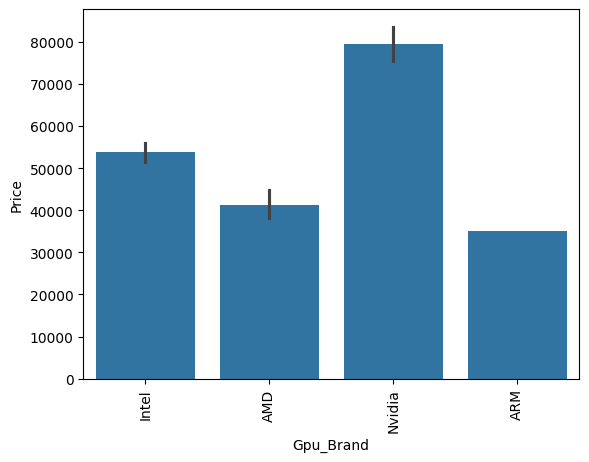

In [543]:
sns.barplot( x = df['Gpu_Brand'] , y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

// dataset is so bad kii arm ka eek he laptop 
// ha

In [544]:
df = df[df['Gpu_Brand'] != 'ARM']

In [545]:
df['Gpu_Brand'].value_counts()

Gpu_Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

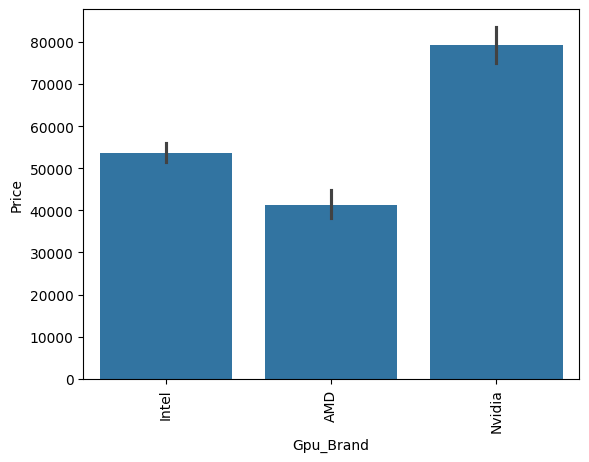

In [546]:
sns.barplot( x = df['Gpu_Brand'] , y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

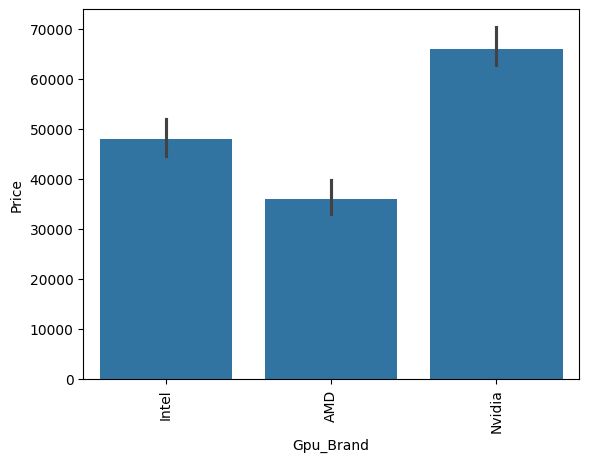

In [547]:
sns.barplot( x = df['Gpu_Brand'] , y = df['Price'], estimator= np.median)
plt.xticks(rotation = 'vertical')
plt.show()

// outiler kaa tuu chakar nahi haa... was cheecking how the heck is intel more epxensive than amd...


In [548]:
# lets now drop gpu 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Gpu          1302 non-null   object 
 4   OpSys        1302 non-null   object 
 5   Weight       1302 non-null   float32
 6   Price        1302 non-null   float64
 7   Touchscreen  1302 non-null   int64  
 8   Ips          1302 non-null   int64  
 9   ppi          1302 non-null   float64
 10  Cpu brand    1302 non-null   object 
 11  HDD          1302 non-null   int64  
 12  SSD          1302 non-null   int64  
 13  Gpu_Brand    1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(6)
memory usage: 142.4+ KB


In [549]:
df.drop(columns= ['Gpu'], inplace=True)

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   OpSys        1302 non-null   object 
 4   Weight       1302 non-null   float32
 5   Price        1302 non-null   float64
 6   Touchscreen  1302 non-null   int64  
 7   Ips          1302 non-null   int64  
 8   ppi          1302 non-null   float64
 9   Cpu brand    1302 non-null   object 
 10  HDD          1302 non-null   int64  
 11  SSD          1302 non-null   int64  
 12  Gpu_Brand    1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 132.2+ KB


// lets go to operating system now...

// how many catgories in operating system..

In [551]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [552]:
df['OpSys'].value_counts().size 

9

// 9 different catgegries.....
// and one op system catgories 
// cleary dominates in freuqnecy which is windows 10..


<Axes: xlabel='OpSys'>

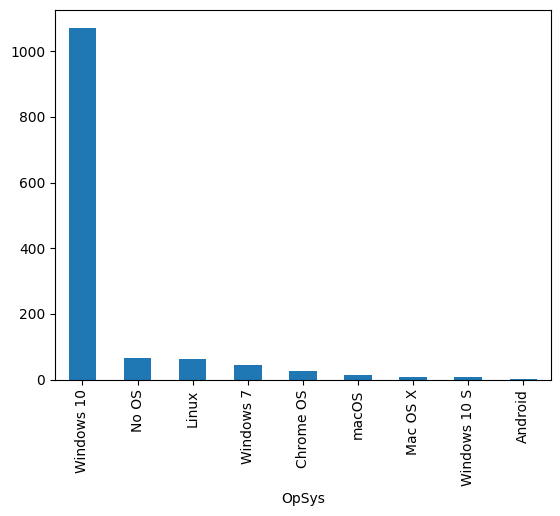

In [553]:
df['OpSys'].value_counts().plot(kind= 'bar')

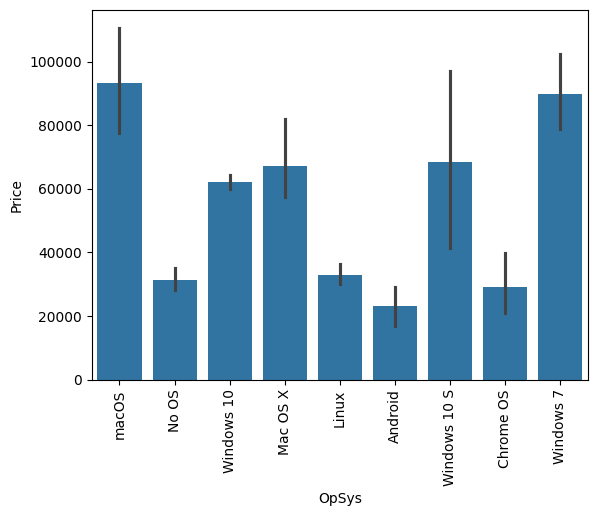

In [554]:
sns.barplot( x = df['OpSys'] , y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

// thiking of divinding it into three columns 
// windows , mac and other os 
// all this i am doing it on the basis of my intutuion
// later if wan to improve i might change it..

// as there are only 9 categories lets make a function to handle that.. 
// simple if else function...



In [555]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [556]:
def cat_os(inp):
    if(inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S'):
       return 'Windows'
    elif (inp == 'macOS' or inp == 'Mac OS X'):
        return 'Mac'
    else: 
       return 'Others/No os/Linux'
    

In [557]:
df['os'] = df['OpSys'].apply(cat_os)

In [558]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu_Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No os/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   OpSys        1302 non-null   object 
 4   Weight       1302 non-null   float32
 5   Price        1302 non-null   float64
 6   Touchscreen  1302 non-null   int64  
 7   Ips          1302 non-null   int64  
 8   ppi          1302 non-null   float64
 9   Cpu brand    1302 non-null   object 
 10  HDD          1302 non-null   int64  
 11  SSD          1302 non-null   int64  
 12  Gpu_Brand    1302 non-null   object 
 13  os           1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(6)
memory usage: 142.4+ KB


In [560]:
df.drop(columns='OpSys',inplace= True)

In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float32
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   Ips          1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   Cpu brand    1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  Gpu_Brand    1302 non-null   object 
 12  os           1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 132.2+ KB


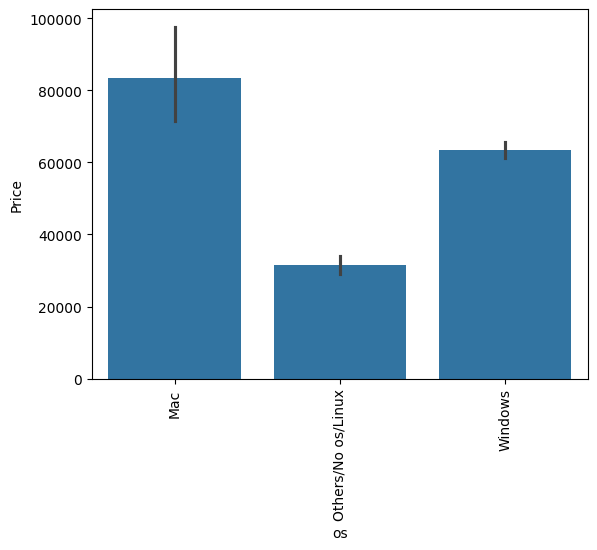

In [562]:
sns.barplot( x = df['os'] , y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

// lets move to next column which is weight..
// weight is continous column...


// df['Weight'].value_counts().plot(kind ='bar')
would not work because it is contnous variable
// that works for only discrte variabe...


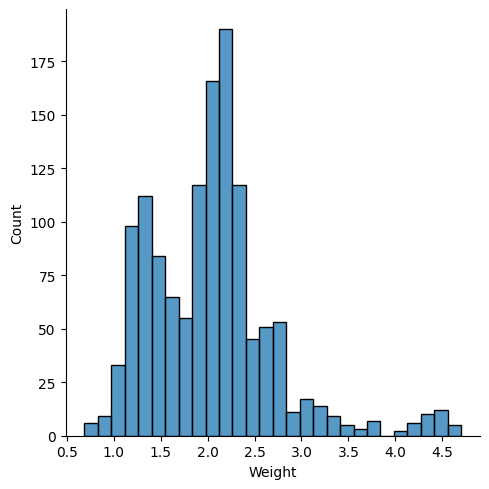

In [563]:
sns.displot(df['Weight'])

// normal hee dekh raha...
// bi-modal distrbution ki feel aa rahi haee..


<Axes: xlabel='Weight', ylabel='Price'>

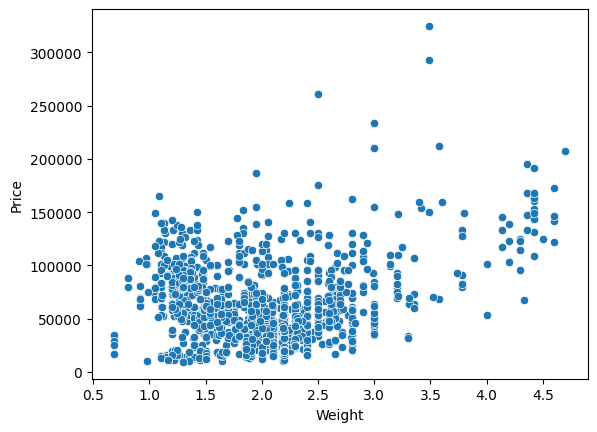

In [567]:
sns.scatterplot(x = df['Weight'] , y = df['Price'])

// kui linear relationship tuu nahi dikh raha..
// but still 


In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float32
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   Ips          1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   Cpu brand    1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  Gpu_Brand    1302 non-null   object 
 12  os           1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 132.2+ KB


In [570]:
df.corr(numeric_only=True)['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

// okk whole columns analysis with price done...

// now lets do anlalsysis of each column with itself..
